In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



def abrirArquivo(path,faixa,renomear):
    df = pd.read_excel(path)
    df['IMC'] = df['massa']/(df['altura']*df['altura'])
    df['situação nutricional'] = pd.cut(df['IMC'],faixa,include_lowest=True,labels=renomear)
    return df

def quartil(df,quartil:list,colunas,agrupar):
    df = df.groupby(agrupar)
    quartils = df[colunas].quantile(quartil).reset_index().rename(columns={'level_1':'Quartils'})
    return quartils


def boxplot(df,agrupar,info):
    fig, ax = plt.subplots(figsize=(8, 8))
    df.boxplot(column=info,by=agrupar,ax=ax)
    plt.title(f'Boxplot agrupado por {agrupar}')
    plt.suptitle('')
    plt.xlabel(agrupar,labelpad=25)
    plt.ylabel(info)
    return plt.show()

faixas = [0,18.5,25,30,35,40,200]
cat_nome = ['Magreza','Normal','Pré-Obesidade','Obesidade I','Obesidade II','Obesidade III']
tabela = abrirArquivo('Exames.xlsx',faixas,cat_nome)

In [87]:
quartil(tabela,[.25,.5,.75],'DLP','situação nutricional')

,situação nutricional,Quartils,DLP
0,Magreza,0.25,275.700
1,Magreza,0.50,366.300
2,Magreza,0.75,456.900
3,Normal,0.25,214.100
4,Normal,0.50,253.600
5,Normal,0.75,320.950
6,Pré-Obesidade,0.25,257.450
7,Pré-Obesidade,0.50,306.650
8,Pré-Obesidade,0.75,372.000
9,Obesidade I,0.25,325.300


In [88]:
quartil(tabela,[.25,.5,.75],'DLP','sexo')

,sexo,Quartils,DLP
0,F,0.25,224.625
1,F,0.50,271.050
2,F,0.75,338.975
3,M,0.25,315.750
4,M,0.50,384.550
5,M,0.75,504.700


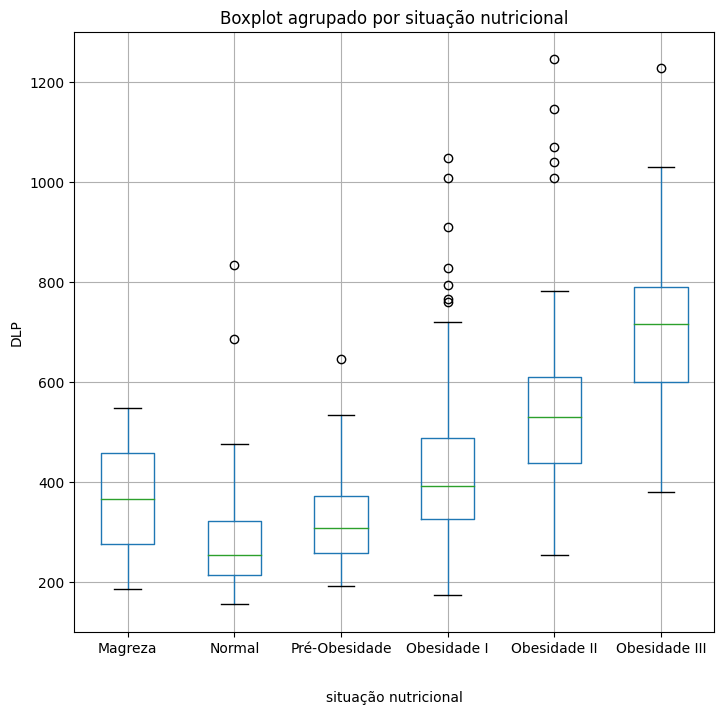

In [89]:
boxplot(tabela,'situação nutricional','DLP')

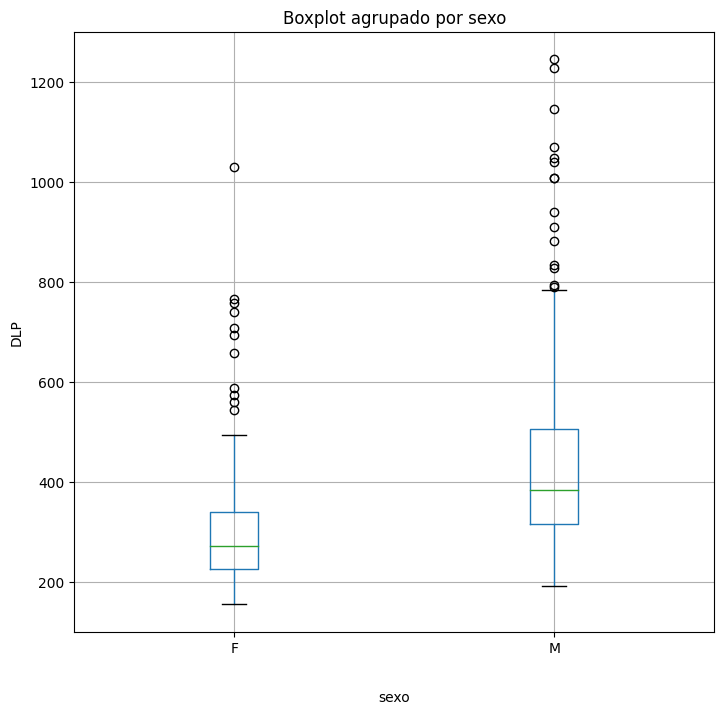

In [90]:
boxplot(tabela,'sexo','DLP')